## Module 5: Analyzing data with Pandas

The most popular package for collecting, arranging, and analyzing data in Python is Pandas. Pandas provides two data structures - Series and DataFrames - that behave like spreadsheets and provide very powerful functionalities. 

We start by importing the need packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Data structures: Series and DataFrame

**A series** is just a list of items, which you can index any way you want. By default, the index is just a list of integers, just like a list. You can initialize a Series from a list or a Numpy array:

In [2]:
fruits = pd.Series(['Apple','Banana','Cantalope','Date'])
fruits

0        Apple
1       Banana
2    Cantalope
3         Date
dtype: object

There are two ways to use different indexing: 

In [3]:
fruits = pd.Series(['Apple','Banana','Cantalope','Date'],index=['a','b','c','d'])
display(fruits)

vegs = pd.Series({'a':'Asparagus','b':'Broccoli','c':'Celery','d':'Dill'})
display(vegs)


a        Apple
b       Banana
c    Cantalope
d         Date
dtype: object

a    Asparagus
b     Broccoli
c       Celery
d         Dill
dtype: object

You can access an item in the list using its index

In [4]:
fruits['b']

'Banana'

 Here, the indices themselves were also specified as a list. 

The **dictionary** is another useful built-in Python data type. It is a collection of  key-value pairs. For example, 


In [5]:
dict={'a':'Apple', 'c':'Cantalope', 'b':'Banana', 'd':'Date'}

is a dictionary, where the letters are the keys and the fruit are their values. Each value (like 'Bannana') is associated with a single key (like 'b'). You can retreive the value that corresponds to a given key by typing 


In [6]:
dict['b']

'Banana'

**DataFrames**, the workhorse of pandas, provide data structures for tables. 

One way to create the DataFrame we’re looking for is to use a dictionary:

In [7]:
dict = {'Fruit':['Apple','Banana','Cantalope','Date'],'Count':[3,5,24,1]}
df = pd.DataFrame(dict)
display(df)

,Fruit,Count
0,Apple,3
1,Banana,5
2,Cantalope,24
3,Date,1


You can still make your own choice about indices: 

In [8]:
df = pd.DataFrame(dict,index=['a','b','c','d'])
df

,Fruit,Count
a,Apple,3
b,Banana,5
c,Cantalope,24
d,Date,1


There are other ways to generate DataFrames, which we will encounter later. An extremely useful one is to obtain it from a file, for example an Excel spreadsheet or a table we downloaded from the internet. A popular format for data online is a comma-separated values (csv) file. 

To get a sense of how easy it is, download a [table with the dates and the final scores of all NBA games](https://projects.fivethirtyeight.com/nba-model/nba_elo.csv) (and additional data). If you open this file with any SpreadSheet software (like Microsoft Excel, Apple Numbers, or Google Sheets), you will see that its first row contains the headers for the different columns, such as “date”, “season”, “team1”, etc. 

We can create a DataFrame that holds part of these data using pandas' `read_csv`. For example, we create a DataFrame that only keep the date, the oposing teams, and the final scores which are listed in columns 0, 4, 5, 22, and 23. This is done by assigning a list of the desired columns to the optional variable `usecols`. The optional argument `header` tells pandas where to find the names of the different columns, which in this case is the first row of the file.

In [9]:
NBAdf = pd.read_csv("https://projects.fivethirtyeight.com/nba-model/nba_elo.csv", usecols=[0,4,5,22,23], header=0)


The resulting DataFrame is a large one -- it is probably a bad idea to try and print all of it. Instead, try typing

In [10]:
NBAdf.head()

,date,team1,team2,score1,score2
0,1946-11-01,TRH,NYK,66.0,68.0
1,1946-11-02,DTF,WSC,33.0,50.0
2,1946-11-02,PRO,BOS,59.0,53.0
3,1946-11-02,STB,PIT,56.0,51.0
4,1946-11-02,CHS,NYK,63.0,47.0


You can access elements from the table in multiple ways. First, you can copy an entire column from a table into a new series, or several columns into a new DataFrame:

In [11]:
team1 = NBAdf['team1']
display(team1.head())

teams = NBAdf[['team1','team2']]
display(teams.head())

0    TRH
1    DTF
2    PRO
3    STB
4    CHS
Name: team1, dtype: object

,team1,team2
0,TRH,NYK
1,DTF,WSC
2,PRO,BOS
3,STB,PIT
4,CHS,NYK


You can turn an entire row into a series, using its index (or multiple rows into a new DataFrame]

In [12]:
display(NBAdf.loc[2])
display(NBAdf.loc[[2,3]])

date      1946-11-02
team1            PRO
team2            BOS
score1          59.0
score2          53.0
Name: 2, dtype: object

,date,team1,team2,score1,score2
2,1946-11-02,PRO,BOS,59.0,53.0
3,1946-11-02,STB,PIT,56.0,51.0


## Data cleanup

Every research starts with a good question.  

_Question_: do the Boston Celtics score more at home than away?

_Approach_: compare the average final scores in home games and on the road. 

While this approach sounds reasonable, it may actually produce a miseading answer. However, it is simple and therefore a useful starting point.  

We already have the data. The important next step is to **clean it up**. The original data file can include planned games with (for obvious reasons) no score. In Python these empty entries get the value 'nan', which stands for “not-a-number”. Fortunately, pandas provides us with a simple way to get rid of all rows that contain 'nan':

In [13]:
df=NBAdf.dropna()

Next, create DataFrames that only contains celtics games, either home or on the road.

In [14]:
is_boston_team1 = NBAdf['team1'] == 'BOS'
is_boston_team2 = NBAdf['team2'] == 'BOS'
boston_home=NBAdf[is_boston_team1]
boston_away=NBAdf[is_boston_team2]

The first two lines create **boolean Series**: series whose only values are **True** or **False**. The first is True only in rows where team1 is the Boston Celtics. Likewise, the second is True only in rows where the Celtics are team2. 

Type `print(is_boston_team1)` or `is_boston_team1.head()` to see for yourself. 

The two following lines use these boolean Series to define two new DataFrames, that only contain the rows where the specified Series is True. In other words, the boston_home and boston_away DataFrame only contain rows where Boston is listed as team1 or team2, respectively. 

Print `boston_home` just to see that we’re all good. 


This last code cell is an example of how to pull subsets of your original dataset into new DataFrames based on some criteria. The conditions we set, which are satisfied for our subset of interest and stored in a boolean Series, are sometimes referred to as **masks**. Pandas makes pulling subsets simple once the competre original dataset is stored in a DataFrame. 

Remember that score1 are the columns that display the home team. Let's change the names of these columns to be more useful to us

In [15]:
boston_home=boston_home.rename(columns={'score1':'Celtics','score2':'Guests'})
boston_away=boston_away.rename(columns={'score1':'Hosts','score2':'Celtics'})
boston_home.head()

,date,team1,team2,Celtics,Guests
7,1946-11-05,BOS,CHS,55.0,57.0
25,1946-11-16,BOS,TRH,53.0,49.0
38,1946-11-21,BOS,STB,53.0,65.0
48,1946-11-25,BOS,PRO,59.0,71.0
56,1946-11-28,BOS,PIT,59.0,55.0


### Addressing our question

As you may recall, we have chosen the simpe approach of comparing average scores. Sure enough, Pandas will calculate means for us:

In [16]:
average_score_home = boston_home['Celtics'].mean()
average_score_away = boston_away['Celtics'].mean()
print(average_score_home, average_score_away)

106.79689830002982 102.58380952380952


On the day we performed this analysis, the scores were about 107 and 103, respectively. On average, the Celtics scored 4 points more at home than on the road. Of course, it is possible that this is a mere coioncidence, and that this difference is not statistically significant. The Statistics module deals with this question. 

<!-- <span style='color:green'> -->
<div class="alert alert-block alert-info">


**Now You:** 
Using the df DataFrame and it `mean`, `std` and `corr` methods, to calculate the mean and standard deviation of the score at home and away across all teams, and to compute the correlation between the two.

## Split, Apply, Combine - the Groupby object

Let's take a different approach: first, we will take the df DataFrame and group its rows according to their home team. We will then calculate the mean of each column in each group. This will give us the average score of every team in its home games. We will then do the same, this time grouping the rows according to their away team. 

In [17]:
means_by_home=NBAdf.groupby('team1').mean()
means_by_away=NBAdf.groupby('team1').mean()

means_by_home

,score1,score2
team1,,
ANA,112.000000,115.341463
AND,88.631579,81.184211
ATL,104.772405,101.871340
BAL,114.903292,112.368313
BLB,82.100719,82.762590
...,...,...
WAS,101.656282,100.465213
WAT,79.645161,78.870968
WSA,115.000000,112.382353


The two DataFrames have the same index, so we can join them into a single table. The problem is that both tables have the same column names, so we will change them a little by adding a different suffix to the column of each table.

In [18]:
means=means_by_home.join(means_by_away,lsuffix='_home',rsuffix='_away')
means

,score1_home,score2_home,score1_away,score2_away
team1,,,,
ANA,112.000000,115.341463,112.000000,115.341463
AND,88.631579,81.184211,88.631579,81.184211
ATL,104.772405,101.871340,104.772405,101.871340
BAL,114.903292,112.368313,114.903292,112.368313
BLB,82.100719,82.762590,82.100719,82.762590
...,...,...,...,...
WAS,101.656282,100.465213,101.656282,100.465213
WAT,79.645161,78.870968,79.645161,78.870968
WSA,115.000000,112.382353,115.000000,112.382353


of course, the only columns that make sense are score1_home (which is the average score of each team in its home games) and score2_away (the average of each team in its away games). Let's plot the two against each other.

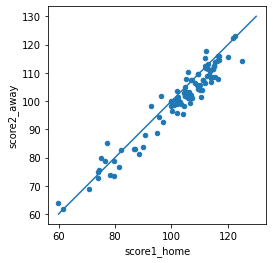

In [19]:
means.plot.scatter(x='score1_home',y='score2_away')
plt.plot([60,130],[60,130])
plt.gca().set_aspect('equal')

From this graph it looks clear that almost all teams score on average more in their home games than in their away games.

<!-- <span style='color:green'> -->
<div class="alert alert-block alert-info">


**Now You:** 
The file https://raw.githubusercontent.com/nytimes/covid-19-data/master/live/us-counties.csv contains the number of COVID-19 cases identified in the US by date and county.
1. Load this file into a dataframe. 
2. Keep in your dataframe only the rows related with the most recent date. 
3. Group the rows by state, and summarize all the number of cases in each state. 
4. Using `DataFrame.plot.hist` plot a histogram of the number of cases per state on this date.


## Adding some graphics

A previous module presents matplotlib, Python's main engine for plotting data. Pandas provides a great interfece to this package, so you can create lots of excellent graphs directly from your DataFrame. 

Let's start by looking at the distribtion of scores home and away:

<AxesSubplot:title={'center':'away'}, ylabel='Density'>

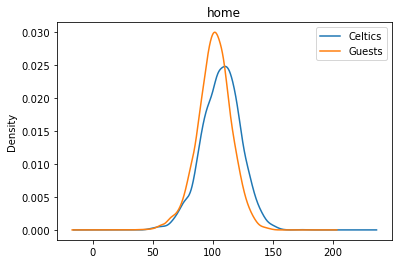

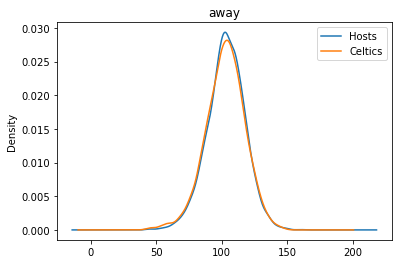

In [20]:
boston_home.plot.kde(title='home')
boston_away.plot.kde(title='away')

The difference between home and away seems more clear now. If you want, you can put all these on the same (somewhat busy) axes:

<AxesSubplot:title={'center':'away'}, ylabel='Density'>

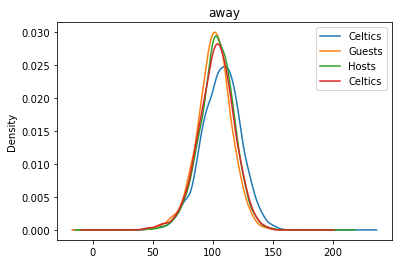

In [21]:
_, ax=plt.subplots(1,1)
boston_home.plot.kde(title='home',ax=ax)
boston_away.plot.kde(title='away',ax=ax)

BTW, if you prefer histrograms:

<AxesSubplot:title={'center':'away'}, ylabel='Frequency'>

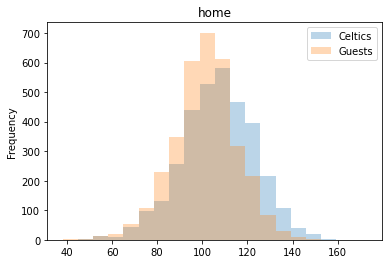

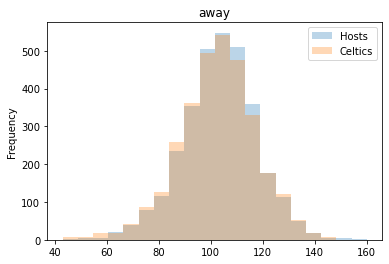

In [22]:
boston_home.plot.hist(title='home',bins=20,alpha=0.3)
boston_away.plot.hist(title='away',bins=20,alpha=0.3)

Want so see how the number of points scored by the celtics in each game is related with the number of points they take? 

<AxesSubplot:xlabel='Guests', ylabel='Celtics'>

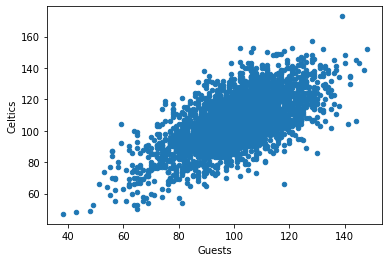

In [23]:
boston_home.plot.scatter(x='Guests',y='Celtics')

## Map and apply

We can easily apply a function or a dictionary to all elements in a DataFrame with the map method. Here is a quick example:

In [24]:
df = pd.DataFrame(np.random.randint(10,size=(5,2)))
df

,0,1
0,9,8
1,7,1
2,6,6
3,3,4
4,3,0


In [25]:
df.applymap(np.sqrt)

,0,1
0,3.000000,2.828427
1,2.645751,1.000000
2,2.449490,2.449490
3,1.732051,2.000000
4,1.732051,0.000000


In [26]:
df.applymap(lambda x: x**2)

,0,1
0,81,64
1,49,1
2,36,36
3,9,16
4,9,0


In [27]:
# mapping with a dictionary

d = {x:'this numer: {}'.format(x) for x in range(10)}
df.applymap(d.get)

,0,1
0,this numer: 9,this numer: 8
1,this numer: 7,this numer: 1
2,this numer: 6,this numer: 6
3,this numer: 3,this numer: 4
4,this numer: 3,this numer: 0


If we need to apply a function to an entire row or column, we use the method apply

In [28]:
df.apply(sum) # this is the same as df.sum()

0    28
1    19
dtype: int64

In [29]:
df.apply(sum,axis=1) # this is the same as df.sum(axis=1)

0    17
1     8
2    12
3     7
4     3
dtype: int64

In [30]:
df.apply(lambda x: sum(x**2),axis=1) # this has no built-in equivalent

0    145
1     50
2     72
3     25
4      9
dtype: int64

<!-- <span style='color:green'> -->
<div class="alert alert-block alert-info">


**Now You:** Calculate the average of $\sin(x)$ for each column in two ways: using `apply` and `DataFrame.mean`, or using only `applymap`.

## Data-driven graphics with Seaborn

Seaborn is a powerful package for data-driven graphics that plays extra-well with Pandas DataFrames. Seaboarn functions usually take the entire DataFrame as an argument, and allow you to decide how you're going to use each column: perhaps you'd like to use one column for the vertical axis, another columns for the horizontal one, color by another columns, resize the symbols by another, etc. 

We'll demonstrate with a shorter version of our NBA DataFrame. 

In [31]:
NBAsf = NBAdf.loc[NBAdf.team1.isin(['BOS','CHI','ATL'])]
NBAsf.shape

(8063, 5)

<AxesSubplot:xlabel='score1', ylabel='score2'>

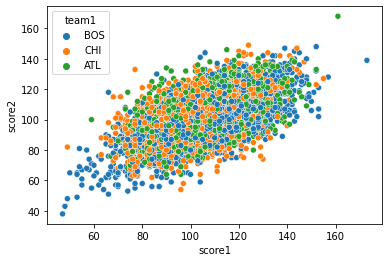

In [32]:
import seaborn as sns

sns.scatterplot(data=NBAsf,x='score1',y='score2',hue='team1')

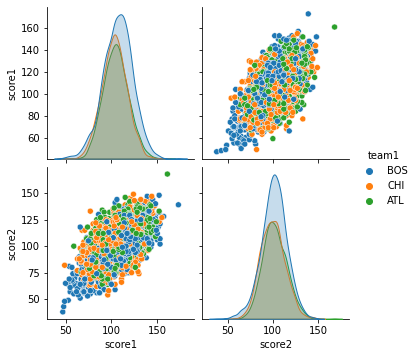

In [33]:
sns.pairplot(NBAsf, hue="team1")

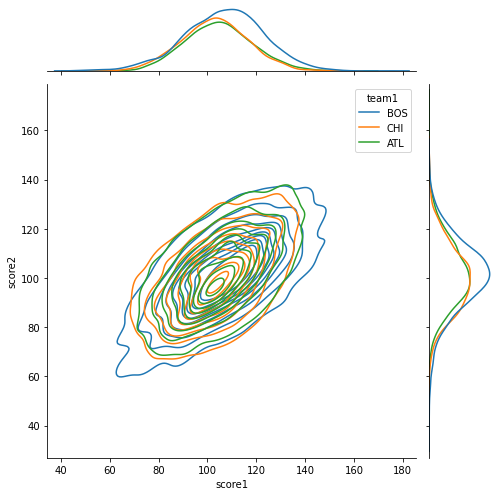

In [34]:
sns.jointplot(data=NBAsf,x='score1',y='score2',hue='team1',
                  kind="kde", height=7)

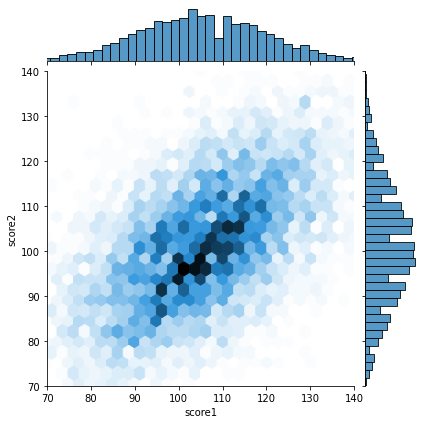

In [35]:
sns.jointplot(data=NBAsf,x='score1',y='score2',kind="hex", xlim=(70, 140), ylim=(70, 140))

Many seaborn functions use matrices in "long format". Easiest way to explain what this means is with a small example. Here is a table in a short format

In [36]:
grades = pd.DataFrame({'names':['Brandon','Jacob','Chris'],'Chinese':[98,77,90],'Algebra':[100,90,85]})
grades

,names,Chinese,Algebra
0,Brandon,98,100
1,Jacob,77,90
2,Chris,90,85


And now the same DataFrame in a long format. We can obtain the long format of table with Panda's melt method, which we'll explain below.

In [37]:
grades_lf=grades.melt('names',value_vars=['Chinese','Algebra'],var_name='Course',value_name='grade')
grades_lf

,names,Course,grade
0,Brandon,Chinese,98
1,Jacob,Chinese,77
2,Chris,Chinese,90
3,Brandon,Algebra,100
4,Jacob,Algebra,90
5,Chris,Algebra,85


In this long format we combined the two columns 'Chinese' and 'Algbera' into a single long column which we called 'grade', and created a new column 'Course' to tell us which value came from which original column. 

Let's create a long format of our NABsf DataFrame, and check out more cool Seaborn examples. 

In [38]:
NBAlf = NBAsf.melt(['date','team1','team2'],value_vars=['score1','score2'],value_name='score',var_name='home/away')
NBAlf.head()

,date,team1,team2,home/away,score
0,1946-11-05,BOS,CHS,score1,55.0
1,1946-11-16,BOS,TRH,score1,53.0
2,1946-11-21,BOS,STB,score1,53.0
3,1946-11-25,BOS,PRO,score1,59.0
4,1946-11-28,BOS,PIT,score1,59.0


To make things nicer in the legends of our graphs below, let's change the values of the home/away column using Panda's replace method.

In [39]:
NBAlf.replace({'score1':'home','score2':'away'},inplace=True)
NBAlf.head()

,date,team1,team2,home/away,score
0,1946-11-05,BOS,CHS,home,55.0
1,1946-11-16,BOS,TRH,home,53.0
2,1946-11-21,BOS,STB,home,53.0
3,1946-11-25,BOS,PRO,home,59.0
4,1946-11-28,BOS,PIT,home,59.0


<AxesSubplot:xlabel='date', ylabel='score'>

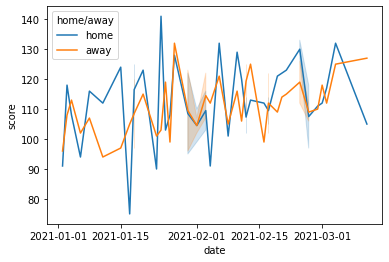

In [40]:
#To filter keep only more recent games we will need to turn the 'date' columns into a datetime format.
NBAlf.loc[:,'date']=pd.to_datetime(NBAlf['date'], infer_datetime_format=True)  
sns.lineplot(data=NBAlf.loc[NBAlf.date > pd.Timestamp(2021, 1, 1),:],x='date',y='score',hue='home/away')

Seaborn also provided very cool themes, which - once called - will change the appearance of all subsequent plots. 

Check out your options [here](https://seaborn.pydata.org/tutorial/aesthetics.html)

In [41]:
sns.set_theme(style='darkgrid')

<AxesSubplot:xlabel='team1', ylabel='score'>

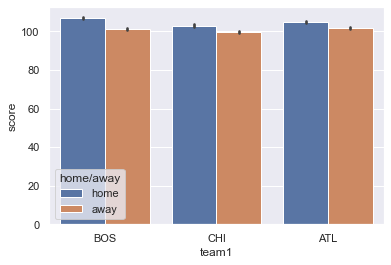

In [42]:
sns.barplot(data=NBAlf,x='team1',y='score',hue='home/away')

<AxesSubplot:xlabel='team1', ylabel='score'>

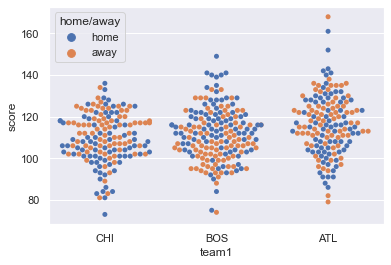

In [43]:
sns.swarmplot(data=NBAlf.loc[NBAlf.date > pd.Timestamp(2019, 1, 1),:],x='team1',y='score',hue='home/away')

<AxesSubplot:xlabel='team1', ylabel='score'>

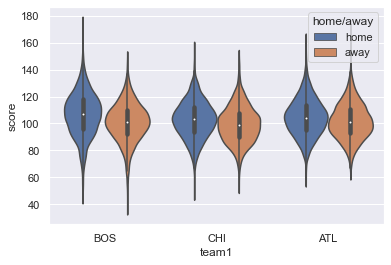

In [44]:
sns.violinplot(data=NBAlf,x='team1',y='score',hue='home/away')

<AxesSubplot:xlabel='team1', ylabel='score'>

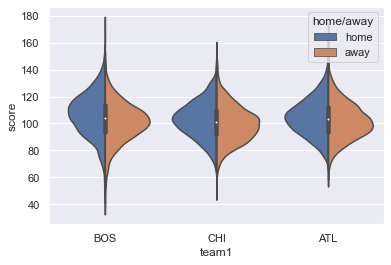

In [45]:
sns.violinplot(data=NBAlf,x='team1',y='score',hue='home/away',split=True)